In [1]:
from pyvisgen.layouts.layouts import get_array_layout, Stations

In [2]:
vlba_layout = get_array_layout("vlba")

In [3]:
vla_layout = get_array_layout("vla")

In [4]:
eht_layout = get_array_layout("eht")

In [5]:
from pyvisgen.simulation.utils import calc_ref_elev
from datetime import datetime
import pandas as pd
import numpy as np
import astropy.units as un
from astropy.time import Time
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

In [17]:
start_time_l = datetime.strptime("01-01-2020 00:00:01", "%d-%m-%Y %H:%M:%S")
start_time_h = datetime.strptime("31-12-2021 23:59:59", "%d-%m-%Y %H:%M:%S")
start_times = pd.date_range(
    start_time_l,
    start_time_h,
    freq="1h",
).strftime("%d-%m-%Y %H:%M:%S")
scan_start = np.random.choice(
    [datetime.strptime(time, "%d-%m-%Y %H:%M:%S") for time in start_times]
)
scan_start

datetime.datetime(2021, 6, 22, 18, 0, 1)

In [18]:
start_time = Time(scan_start.isoformat(), format="isot")
interval = 3600
num_scans = 3
scan_duration = 360
int_time = 30

time_lst = [
    start_time + interval * i * un.second + j * int_time * un.second
    for i in range(num_scans)
    for j in range(int(scan_duration / int_time) + 1)
]
# +1 because t_1 is the stop time of t_0
# in order to save computing power we take one time more to complete interval
time = Time(time_lst)
time.shape

(39,)

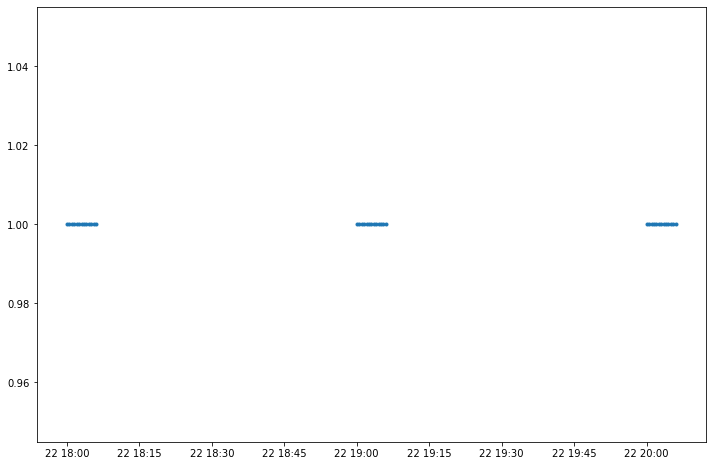

In [19]:
plt.figure(figsize=(12,8))
plt.plot(time.datetime, np.ones(time.shape), marker=".", linestyle="none")

In [20]:
src_crd = SkyCoord(
    ra=240,
    dec=50,
    unit=(un.deg, un.deg),
)

array_layout = get_array_layout("vlba")

_, el_st_all = calc_ref_elev(src_crd, time, array_layout)

el_min = 15
el_max = 85

valid = np.where((el_st_all >= el_min) & (el_st_all <= el_max), np.zeros(el_st_all.shape), 1)
print(valid)
telescopes = valid * (np.arange(10) + 1)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1.

Text(0.5, 0, 'Time')

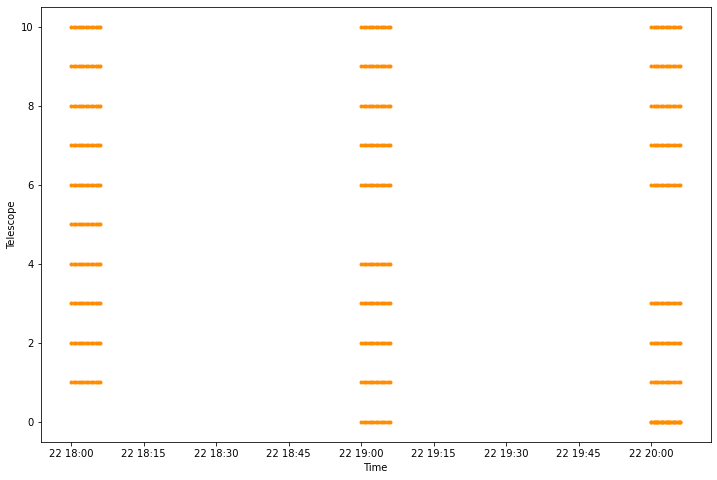

In [21]:
plt.figure(figsize=(12,8))
plt.plot(time.datetime, telescopes, color="darkorange", marker=".", linestyle="none")

plt.ylabel("Telescope")
plt.xlabel("Time")